# Clustering: What and when

Clustering is an unnsupervised learning model method by which we group data points into clusters based on some characteristics the model sees. There can either be **soft clusters** or **hard clusters**. 
A **hard cluster** is when a data point is assigned to a definite cluster and no others. A **soft cluster** is when an observation is given probabilities to the different clusters it could belong to, with the highest one deciding which cluster it belongs to. 

Clustering is a great way to generate models for features as well as learning ways to find associations between data points. A *caveat* to this is that the data must be normalized first in order to ensure all variables have equal impact. Also, just because the model finds a certain number of clusters doesn't make it meaningful. If the model tries to find too many clusters, then it can start splitting data points that should belong to similar clusters based on trivial differences. This leads to overfitting in the model. If we have too few clusters, then we won't get much information and the real differences between the data points gets obscured. 

We also have heirarchal clusters, which is when we have clusters within clusters. Very useful if we are interest in subdivisions in groups, ex: Young men, young women, old men, and old women. We would have the male or female cluster first, then within each of those we would have a cluster for if they are young or old. 

## K-means clustering
A straightforward, yet computationally intensive model. Similar to KNN, k-means clustering tries to hard cluster similar data with similar variance. It uses a cost function called *inertia*, and the algorithm tries to choose means (or *centroid*) that try to minimize the inertia. 

The formula for inertia is reminiscent from the cost function for linear regression:
$$\sum(\bar{x}_c - x_i)^2$$

Inertia is described as the sum of the squared difference between the centroid of a cluster ($\bar{x}_c$) and the data point in the cluster (${x}_i$). The goal is to define a cluster mean that minimizes the distance between the centroid and all the data points for that cluster.

The *means* in k-means refers to the centroids and *k* refers to the number of clusters, a number that we decide for the model. How we pick this number is based on trial and error

### How the algorithm works
$k$-means is an iterative algorithm that eventually converges on a solution.  It begins by choosing $k$ centroids at random, then repeats the following two steps until convergence:

1. Assign each data point to the nearest centroid
2. Create new centroids by taking the mean of all the data points assigned to each centroid

The algorithm stops when the difference between the old and new centroids is lower than a given threshold.

Like other iterative algorithms with a random start, bad starting centroid values can cause $k$-means to arrive at a lousy solution.  As a result, it is recommended to try the algorithm a few times with different starting centroids.  The sklearn implementation has a nifty `kmeans++` option for initializing centroids that are distant from each other, which is less likely to end in a flawed solution.

### Assumptions of K-means
* k-means assumes that the 'underlying' true clusters are radially symmetrical (isotropic), meaning that that they are uniform in all directions and edges curve outwards
* Clusters should have similar variance

### Speed concerns
High-dimensional data can be very costly on k-means, considering it has to measure the distance between each data point as well as the means of the high-dimension data. 
A common practice is to run PCA on some variables to reduce dimensionality, then search for clusters in the reduced data.

You can also use MiniBatchKMeans, which randomly subsets samples from the traning data to run the algorithm on and converge to a solution, albeit the result is slightly worse than a regular k-means but runs drastically faster.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

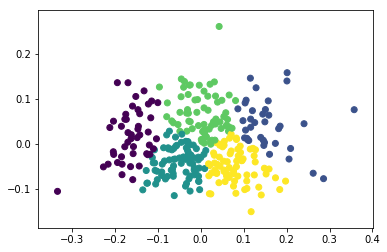

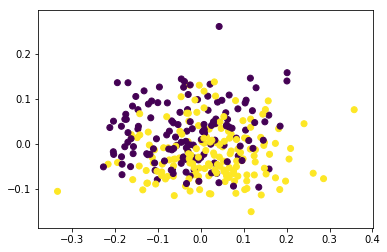

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      36  11
1      15  21
2      34  46
3      40  28
4      14  58


In [17]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=40).fit_predict(X_norm)
#how does adding more clusters help in a binary classification problem

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [13]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

8.73 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        0  132
1      154   17
